In [304]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial import distance as dist

In [305]:
test = cv2.imread("Test/Test.Bmp", 0) 
draw = cv2.imread("Test/Draw.jpg", 0) 

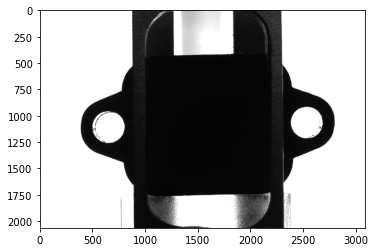

In [306]:
plt.imshow(test,cmap='gray', vmin=0, vmax=255)
plt.show()

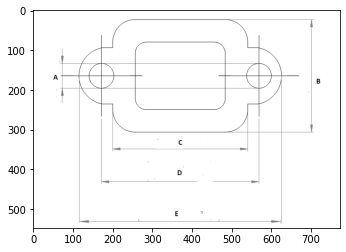

In [307]:
plt.imshow(draw,cmap='gray', vmin=0, vmax=255)
plt.show()

## Calculations

### To Find:

* A, B, C, D, E

### Solution:
A = 2 x radius of circle  
B = Bounding Box width for complete object  
C = D - A   ( D - 2 x radius of circle)  assumption that circles are tangent to perpendicular drawn from C's end point  
D = Distance between center of two circles  
E = Bounding Box length for complete object

In [308]:
test.shape

(2064, 3088)

In [309]:
def detect_circles(image):
    gray = cv2.GaussianBlur(image, (5, 5), 0)
    detected_circles = cv2.HoughCircles(gray,  
                   cv2.HOUGH_GRADIENT, 1, minDist = 1500, param1 = 50, 
               param2 = 30, minRadius = 50, maxRadius = 200)
    height, width = image.shape[0], image.shape[1]
    result = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    if detected_circles is not None: 
        # Convert the circle parameters a, b and r to integers. 
        detected_circles = np.uint16(np.around(detected_circles)) 

        for pt in detected_circles[0, :]: 
            a, b, r = pt[0], pt[1], pt[2] 
            print(f"Circle found! Centre point coordinates: ({a}, {b}) and radius: {r}")
            # Draw the circumference of the circle. 
            result = cv2.circle(result, (a, b), r, (0, 255, 0), 15)
    return result


Circle found! Centre point coordinates: (2526, 1066) and radius: 150
Circle found! Centre point coordinates: (650, 1108) and radius: 151


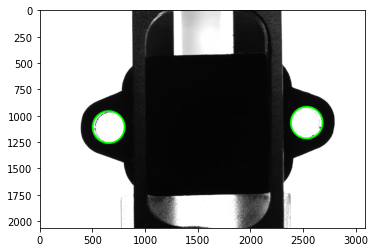

In [310]:
result = detect_circles(test)
plt.imshow(result)
plt.show()

In [311]:
a = (2526, 1066)
b = (650, 1108)
D =  dist.euclidean(a, b)
radius = (150 + 151)/2
A = 2*radius
C = D - A
print(f'Dimensions are, A:{A}, C:{C}, D:{D}')

Dimensions are, A:301.0, C:1575.4700903558255, D:1876.4700903558255


## Found: A, C, D  
* A: 301.0
* C: 1575.4700903558255
* D: 1876.4700903558255

## To find B, E

* B = Bounding Box width for complete object in Draw
* E = Bounding Box length for complete object in Draw

In [312]:
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

def get_countours(image):
    gray = cv2.GaussianBlur(image, (5, 5), 0)
    # perform edge detection, then perform a dilation + erosion to
    # close gaps in between object edges
    edged = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)[1]
    edged = cv2.Canny(edged, 100, 20)
    edged = cv2.dilate(edged, None, iterations=10)
    edged = cv2.erode(edged, None, iterations=10)
#     edged = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)[1]
    # find contours in the edge map
    cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     img_copy = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    height, width = image.shape[0], image.shape[1]
    result = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    num_rect = 0
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)    
        if len(approx) == 4:
            num_rect+=1
            x,y,w,h = cv2.boundingRect(c)
            cv2.rectangle(result,(x,y),(x+w,y+h),(0,255,0),10)            
#     result = cv2.drawContours(result, cnts, -1, (0,255,0), 10)
    print(num_rect)
    return result, edged

4


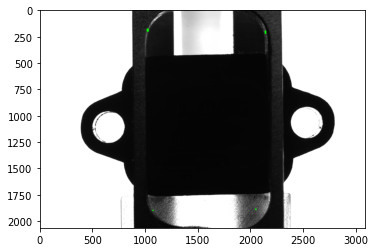

In [313]:
result, edged = get_countours(test)
plt.imshow(result)
plt.show()

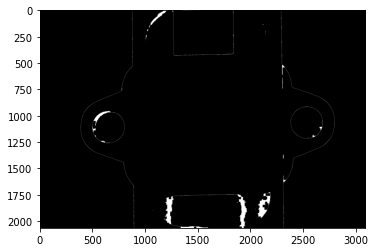

In [314]:
plt.imshow(edged, cmap='gray', vmin=0, vmax=255)
plt.show()